In [2]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

# Scraping points and goals data from Premier League website

In [3]:
def scrape_data():
    points=[]
    goals=[]
    year=2022
    # Scrapes data from 2022 to 2017
    for season in range(5):
        
        html_text = requests.get(f"https://www.soccerstats.com/latest.asp?league=england_{year}").text
        soup=BeautifulSoup(html_text,'html.parser')
        tables=soup.find_all('table',id="btable")
        
        # Catch the premier league table
        for table in tables:
            indicator = table.find_all('font')
            for item in indicator:
                if item.text=="GP":
                    pl_table=table
                    break
                    
        # Loop through all rows and find points and goals
        table_rows=pl_table.find_all('tr',class_="odd")
        for row in table_rows:

            stats = row.find_all('td',align="center")

            goals.append(int(stats[5].text))
            points.append(int(stats[8].text))
        year-=1

#     for i in range(len(points)):
#          print(f"Points : {points[i]}\t Goals :{goals[i]}")
    return goals, points

# Check Data

In [4]:
goals, points=scrape_data()
for i in range(len(points)):
    print(f"Points : {points[i]}\t Goals :{goals[i]}")

Points : 93	 Goals :99
Points : 92	 Goals :94
Points : 74	 Goals :76
Points : 71	 Goals :69
Points : 69	 Goals :61
Points : 58	 Goals :57
Points : 56	 Goals :60
Points : 52	 Goals :62
Points : 51	 Goals :42
Points : 51	 Goals :38
Points : 49	 Goals :44
Points : 48	 Goals :50
Points : 46	 Goals :48
Points : 45	 Goals :52
Points : 40	 Goals :43
Points : 39	 Goals :43
Points : 38	 Goals :42
Points : 35	 Goals :34
Points : 23	 Goals :34
Points : 22	 Goals :23
Points : 86	 Goals :83
Points : 74	 Goals :73
Points : 69	 Goals :68
Points : 67	 Goals :58
Points : 66	 Goals :68
Points : 65	 Goals :62
Points : 62	 Goals :68
Points : 61	 Goals :55
Points : 59	 Goals :62
Points : 59	 Goals :47
Points : 55	 Goals :55
Points : 45	 Goals :46
Points : 45	 Goals :36
Points : 44	 Goals :41
Points : 43	 Goals :47
Points : 41	 Goals :40
Points : 39	 Goals :33
Points : 28	 Goals :27
Points : 26	 Goals :35
Points : 23	 Goals :20
Points : 99	 Goals :85
Points : 81	 Goals :102
Points : 66	 Goals :66
Points : 6

# Convert to NumPy array

In [5]:
x_train=np.array(goals)
y_train=np.array(points)
print(x_train)
print(y_train)

[ 99  94  76  69  61  57  60  62  42  38  44  50  48  52  43  43  42  34
  34  23  83  73  68  58  68  62  68  55  62  47  55  46  36  41  47  40
  33  27  35  20  85 102  66  69  67  61  51  56  39  43  51  44  38  31
  39  49  41  40  36  26  95  89  63  67  73  65  47  54  51  52  52  51
  42  56  45  45  35  34  34  22 106  68  74  84  62  74  36  44  56  39
  45  45  48  44  34  28  37  28  35  31]
[ 93  92  74  71  69  58  56  52  51  51  49  48  46  45  40  39  38  35
  23  22  86  74  69  67  66  65  62  61  59  59  55  45  45  44  43  41
  39  28  26  23  99  81  66  66  62  59  59  56  54  54  52  49  44  43
  41  39  35  34  34  21  98  97  72  71  70  66  57  54  52  52  50  49
  45  45  40  39  36  34  26  16 100  81  77  75  70  63  54  49  47  44
  44  44  42  41  40  37  36  33  33  31]


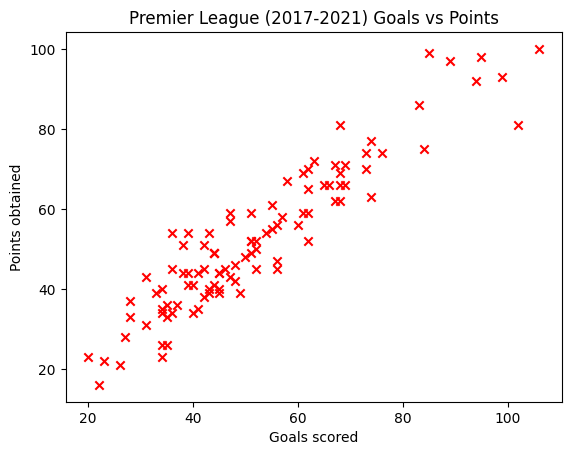

In [219]:
# Creating a scatter plot of the data
plt.scatter(x_train, y_train,marker='x',c='r')

# Set the title, X-axis label and y-axis label
plt.title("Premier League (2017-2021) Goals vs Points")
plt.xlabel("Goals scored")
plt.ylabel("Points obtained")
plt.show()

## Compute cost for a value of w and b

In [6]:
def compute_cost(x, y, w, b):
    
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

## Compute the gradient and return it

In [7]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

### Cost vs w plot to check if the code is corre}ct

[670007.025      415524.23981481 221545.75092593  88071.55833333
  15101.66203704   2636.06203704  50674.75833333 159217.75092593
 328265.03981481 557816.625     ]


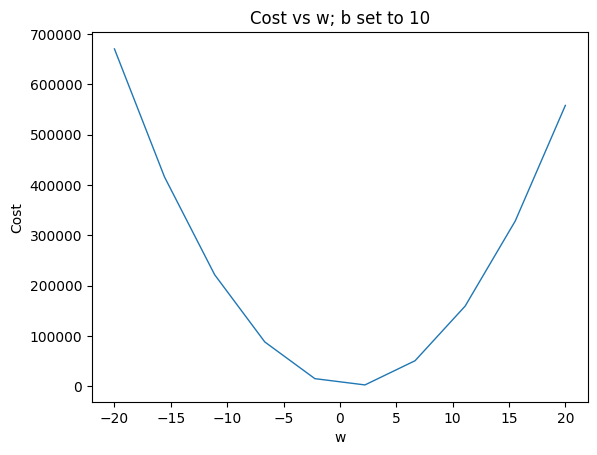

In [8]:

fix_b=5
w_array = np.linspace(-20, 20, 10)

cost = np.zeros_like(w_array)
for i in range(len(w_array)):
    cost[i]=compute_cost(x_train,y_train,w_array[i],fix_b)
print(cost)
plt.title("Cost vs w; b set to 10")
plt.ylabel('Cost')
plt.xlabel('w')
plt.plot(w_array,cost,linewidth=1)

In [9]:
print(compute_cost(x_train,y_train,-10,10))
print(compute_cost(x_train,y_train,5,10))
print(compute_cost(x_train,y_train,0,10))
print(compute_cost(x_train,y_train,5,10))
print(compute_cost(x_train,y_train,10,10))

179669.575
26648.8
1079.975
26648.8
128793.375


In [10]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

### Check if gradient descent is working by checking cost over iterations

Iteration    0: Cost    32.58   
Iteration 1700: Cost    26.95   
Iteration 3400: Cost    24.24   
Iteration 5100: Cost    22.94   
Iteration 6800: Cost    22.31   
Iteration 8500: Cost    22.01   
Iteration 10200: Cost    21.87   
Iteration 11900: Cost    21.80   
Iteration 13600: Cost    21.77   
Iteration 15300: Cost    21.76   
b,w found by gradient descent: 2.55,0.961018756300573 
prediction: 97.69, target value: 93
prediction: 92.89, target value: 92
prediction: 75.59, target value: 74
prediction: 68.86, target value: 71
prediction: 61.17, target value: 69
prediction: 57.33, target value: 58
prediction: 60.21, target value: 56
prediction: 62.13, target value: 52
prediction: 42.91, target value: 51
prediction: 39.07, target value: 51


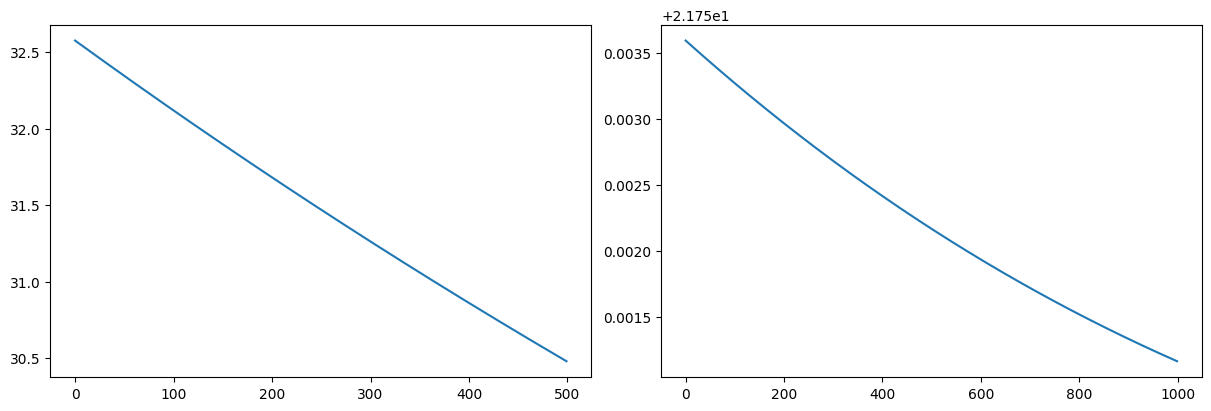

In [11]:
# initialize parameters
initial_w = 1
initial_b = 5
# some gradient descent settings
iterations = 17000
alpha = 2e-6
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(x_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m= x_train.shape[0]

for i in range(10):
    print(f"prediction: {np.dot(x_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:500])
ax2.plot(J_hist[16000:])

### Plotting predicted values vs actual values

In [12]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w_final * x_train[i] + b_final

Text(0, 0.5, 'Points obtained')

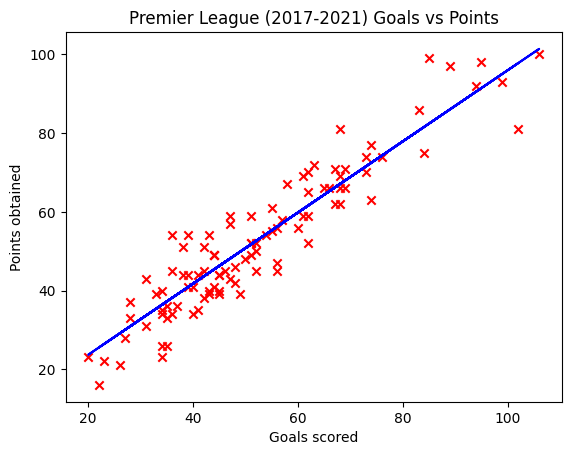

In [203]:
# Plot the linear fit
plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Premier League (2017-2021) Goals vs Points")
plt.xlabel("Goals scored")
plt.ylabel("Points obtained")

In [13]:
predict1 = 70 * w_final + b_final
print(f"For 70 goals scored in a season, we expect the team to get {int(predict1)} points")

predict2 = 90 * w_final + b_final
print(f"For 90 goals scored in a season, we expect the team to get {int(predict2)} points")

For 70 goals scored in a season, we expect the team to get 69 points
For 90 goals scored in a season, we expect the team to get 89 points


In [16]:
goals_input=int(input("Enter the number of goals scored in a season: "))
predict = goals_input * w_final + b_final
print(f"The team is expected to obtain {int(predict)} points")

Enter the number of goals scored in a season: 85
The team is expected to obtain 84 points
